In [1]:
## code to plot histogram in pythonimport numpy as np
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

# histogram equalization

[[[ 17  17  17]
  [ 35  35  35]
  [ 33  35  35]
  ...
  [ 45  37  37]
  [ 58  50  50]
  [118 118 118]]

 [[ 15  15  15]
  [ 35  35  35]
  [ 34  36  36]
  ...
  [ 50  42  42]
  [ 56  48  48]
  [115 115 115]]

 [[ 14  14  14]
  [ 33  35  35]
  [ 35  37  37]
  ...
  [ 45  40  39]
  [ 49  41  41]
  [113 113 113]]

 ...

 [[ 45  66  64]
  [144 166 164]
  [139 166 162]
  ...
  [ 71  86  78]
  [ 55  68  60]
  [111 111 111]]

 [[ 41  62  59]
  [125 146 143]
  [134 157 153]
  ...
  [ 99 112 110]
  [ 64  75  73]
  [112 112 112]]

 [[ 28  49  46]
  [ 96 117 114]
  [ 94 117 113]
  ...
  [100 113 111]
  [ 65  76  74]
  [108 108 108]]]


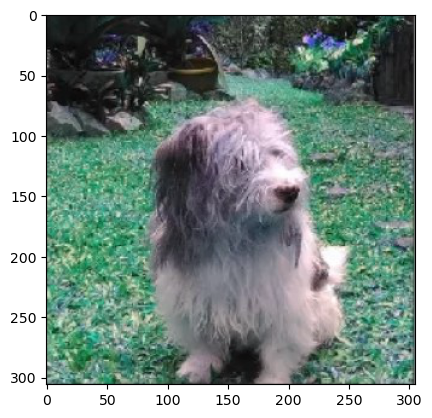

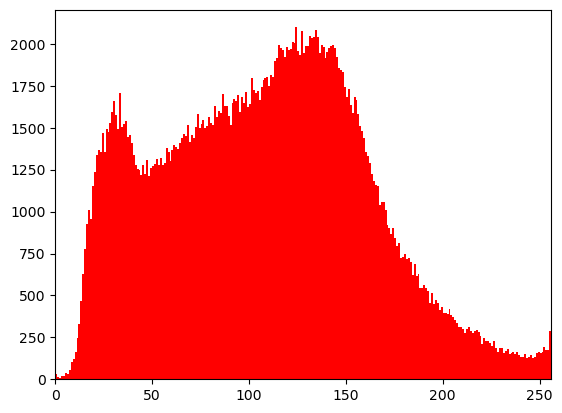

In [7]:
img = cv2.imread('dog.jpg')
print(img)
# Display the images
plt.imshow(img) 
plt.show()

#display the histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [4]:
def histogram_equalization(img_in):

# segregate color streams
    b,g,r = cv2.split(img_in)
    
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
    
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
    
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv2.merge((img_b, img_g, img_r))
    
# validation
    #equ_b = cv2.equalizeHist(b)
    #equ_g = cv2.equalizeHist(g)
    #equ_r = cv2.equalizeHist(r)
    
    #equ = cv2.merge((equ_b, equ_g, equ_r))
    #print(equ)
    #cv2.imwrite('output_name.png', equ)
    return img_out

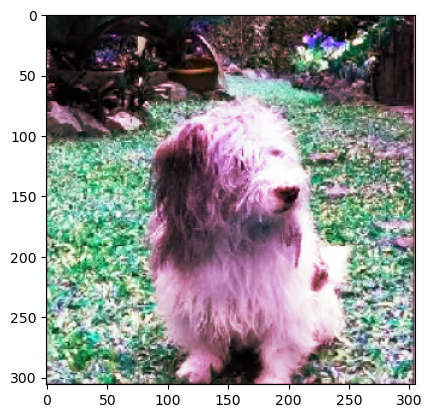

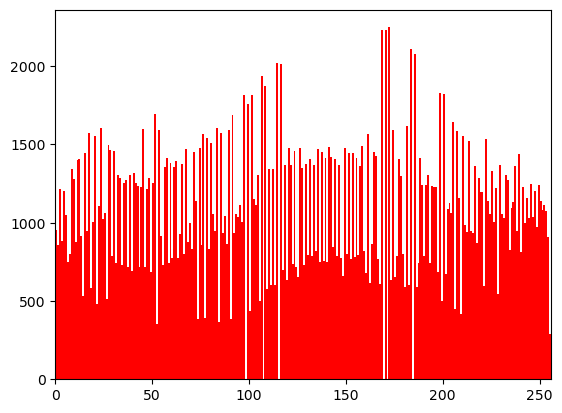

In [5]:
img_out = histogram_equalization(img)

# Display the images
plt.imshow(img_out) 
plt.show()

#display the histogram
hist,bins = np.histogram(img_out.flatten(),256,[0,256])
plt.hist(img_out.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

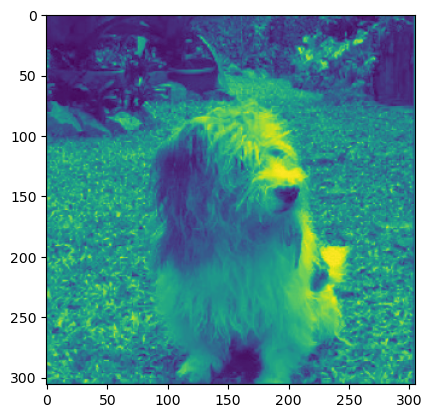

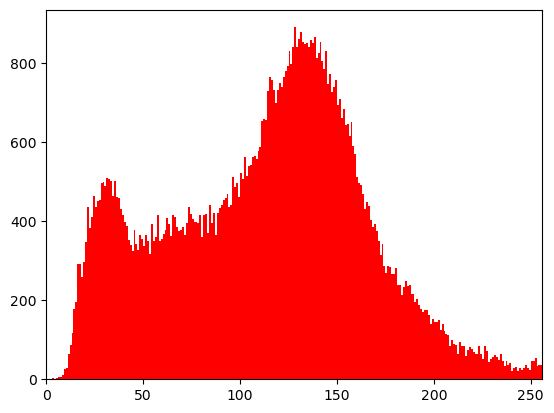

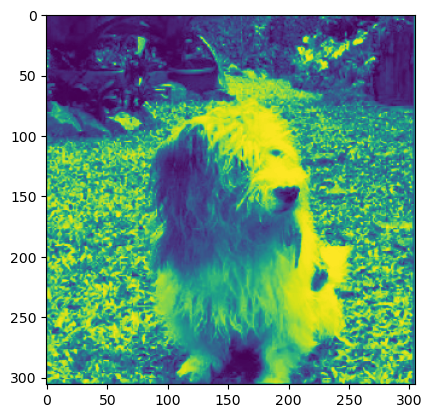

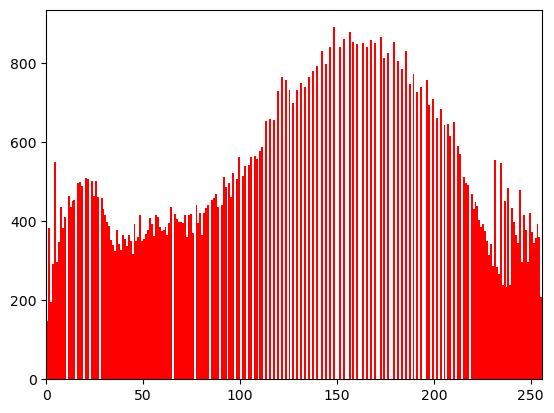

In [6]:
#using opencv built-in function


img = cv2.imread('dog.jpg', 0)

# Display the images
plt.imshow(img) 
plt.show()
#display histogram
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

#histogram equalization
equ = cv2.equalizeHist(img)

#display image
plt.imshow(equ) 
plt.show()
#display histogram
hist,bins = np.histogram(equ.flatten(),256,[0,256])
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

#res = np.vstack((img,equ)) #stacking images side-by-side

# Average or mean filter

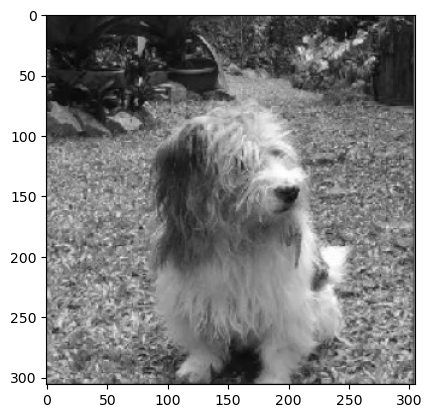

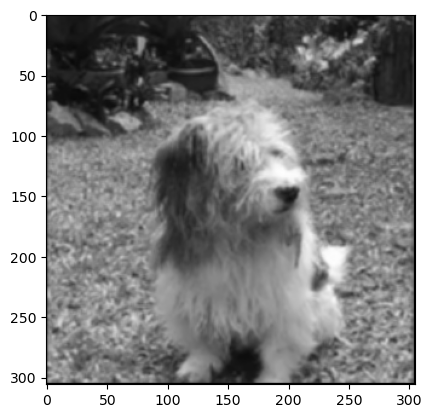

In [8]:
img = cv2.imread('dog.jpg',0)
m, n = img.shape 

img_new = np.zeros([m, n]) 


# Convolve the 3X3 mask over the image 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = 0
        for l in range(-1, 2):
            for k in range(-1, 2):
                temp = temp + img[i+l, j+k]
        temp = temp/9
        
        img_new[i, j]= temp
    
img_new = img_new.astype(np.uint8) 


# Display the images
plt.imshow(img) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Display the images
plt.imshow(img_new)
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)) 
plt.show()

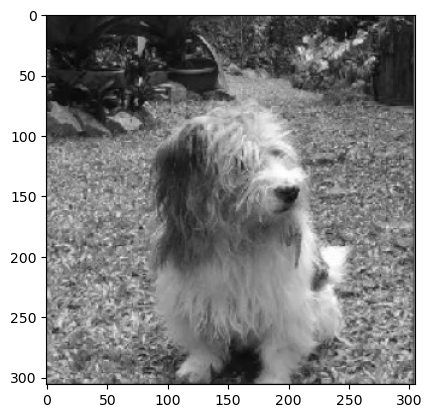

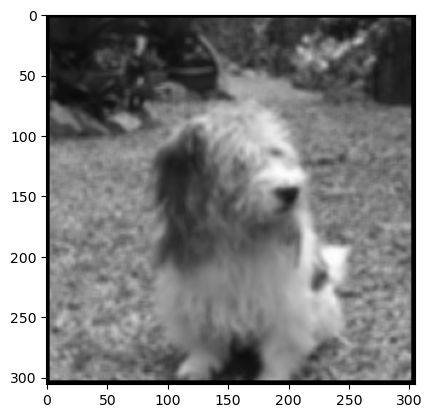

In [9]:
m, n = img.shape 

img_new = np.zeros([m, n]) 
# Convolve the 5X5 mask over the image 
for i in range(3, m-3): 
    for j in range(3, n-3): 
        temp = 0
        for l in range(-2, 3):
            for k in range(-2, 3):
                temp = temp + img[i+l, j+k]
        temp = temp/25
        
        img_new[i, j]= temp 

img_new = img_new.astype(np.uint8) 


# Display the images
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()

# Display the images
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)) 
plt.show()


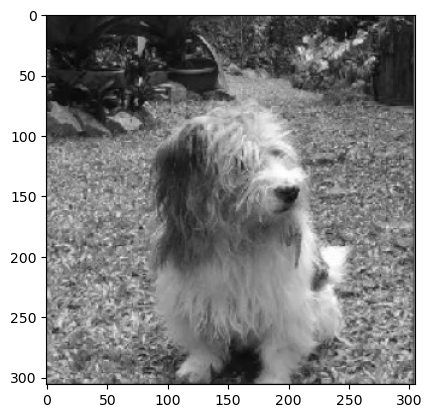

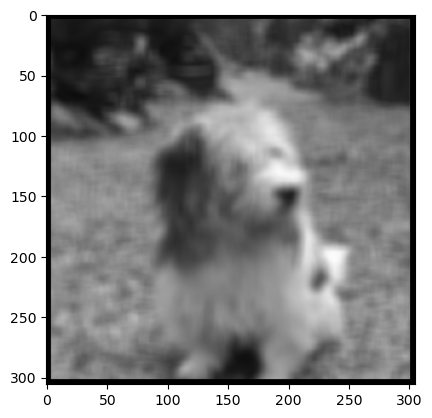

In [10]:
m, n = img.shape 
img_new = np.zeros([m, n]) 
# Convolve the 9X9 mask over the image 
for i in range(4, m-4): 
    for j in range(4, n-4): 
        temp = 0
        for l in range(-4, 5):
            for k in range(-4, 5):
                temp = temp + img[i+l, j+k]
                
        temp = temp/81
                
        
        img_new[i, j]= temp 

img_new = img_new.astype(np.uint8) 


# Display the images
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()

# Display the images
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)) 
plt.show()